In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import requests as req
import time
import re


from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold # 데이터 나누기, 점검 및 훈련

from sklearn.metrics import explained_variance_score, accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score # 평가지표
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler # Feature Scaling


from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_iris, load_boston, load_breast_cancer, make_moons, load_digits, load_diabetes, load_wine, make_blobs # 데이터
import mglearn # 그래프

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVC, LinearSVR

# conda install -c conda -py
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor

# pip install lightgbm
# conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

import graphviz

import statsmodels.api as sm

# SVC는 분류, SVR은 회귀
# 분류알고리즘에선 끝판왕으로 불림
from sklearn.svm import SVR, SVC

## 1. 데이터 불러오기

In [2]:
lunch = pd.read_csv("data/lunch_df_encoding.csv")
dinner = pd.read_csv("data/dinner_df_encoding.csv")

In [3]:
lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               1205 non-null   object 
 1   year                   1205 non-null   int64  
 2   month                  1205 non-null   int64  
 3   date                   1205 non-null   int64  
 4   worker_number          1205 non-null   int64  
 5   real_number            1205 non-null   int64  
 6   vacation_number        1205 non-null   int64  
 7   biztrip_number         1205 non-null   int64  
 8   overtime_number        1205 non-null   int64  
 9   telecom_number         1205 non-null   int64  
 10  temperature            1204 non-null   float64
 11  rain                   1205 non-null   float64
 12  wind                   1204 non-null   float64
 13  humidity               1205 non-null   float64
 14  discomfort_index       1204 non-null   float64
 15  perc

In [4]:
dinner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               1205 non-null   object 
 1   year                   1205 non-null   int64  
 2   month                  1205 non-null   int64  
 3   date                   1205 non-null   int64  
 4   worker_number          1205 non-null   int64  
 5   real_number            1205 non-null   int64  
 6   vacation_number        1205 non-null   int64  
 7   biztrip_number         1205 non-null   int64  
 8   overtime_number        1205 non-null   int64  
 9   telecom_number         1205 non-null   int64  
 10  temperature            1204 non-null   float64
 11  rain                   1205 non-null   float64
 12  wind                   1204 non-null   float64
 13  humidity               1205 non-null   float64
 14  discomfort_index       1204 non-null   float64
 15  perc

In [5]:
lunch = lunch.dropna()
dinner = dinner.dropna()

In [6]:
def split_lunch(data):
    data_train = data.drop(["lunch_number", "datetime"], axis = "columns")
    data_target = data.loc[:, 'lunch_number']
    X_train, X_test, y_train, y_test = train_test_split(data_train, data_target)

    return X_train, X_test, y_train, y_test

def split_dinner(data):
    data_train = data.drop(["dinner_number", "datetime"], axis = "columns")
    data_target = data.loc[:, 'dinner_number']
    X_train, X_test, y_train, y_test = train_test_split(data_train, data_target)

    return X_train, X_test, y_train, y_test

In [7]:
lunch_X_train, lunch_X_test, lunch_y_train, lunch_y_test = split_lunch(lunch)
dinner_X_train, dinner_X_test, dinner_y_train, dinner_y_test = split_dinner(dinner)

In [8]:
lunch_X_train.head()

,year,month,date,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,temperature,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_lunch_N,new_lunch_Y
1113,2020,9,4,3132,2241,208,221,3,462,22.6,...,0,1,0,0,0,0,1,0,1,0
900,2019,10,14,3121,2732,152,237,529,0,15.6,...,0,0,1,0,0,0,1,0,1,0
784,2019,4,22,2822,2460,109,253,533,0,17.5,...,0,0,1,0,0,0,1,0,1,0
470,2017,12,29,2665,1934,489,242,5,0,2.1,...,1,1,0,0,0,0,0,1,1,0
376,2017,8,9,2645,2007,428,210,0,0,26.7,...,0,0,0,0,0,1,1,0,1,0


In [9]:
lunch_X_test.head()

,year,month,date,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,temperature,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_lunch_N,new_lunch_Y
43,2016,4,6,2643,2357,37,249,0,0,11.8,...,0,0,0,0,0,1,1,0,1,0
505,2018,2,21,2707,2390,74,243,0,0,2.9,...,1,0,0,0,0,1,1,0,1,0
357,2017,7,13,2839,2483,79,277,311,0,26.8,...,0,0,0,1,0,0,1,0,1,0
303,2017,4,21,2626,2182,137,307,59,0,14.3,...,0,1,0,0,0,0,1,0,1,0
296,2017,4,12,2626,2344,41,241,0,0,14.0,...,0,0,0,0,0,1,1,0,1,0


In [10]:
dinner_X_train.head()

,year,month,date,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,temperature,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_dinner_N,new_dinner_Y
1133,2020,10,8,3008,2446,88,225,734,249,18.2,...,0,0,0,1,0,0,0,1,1,0
992,2020,2,25,2872,2597,117,158,806,0,8.1,...,1,0,0,0,1,0,1,0,1,0
551,2018,4,27,2714,2205,205,304,40,0,16.1,...,0,1,0,0,0,0,1,0,1,0
370,2017,8,1,2645,1998,466,181,320,0,27.3,...,0,0,0,0,1,0,1,0,1,0
518,2018,3,13,2714,2426,39,249,556,0,10.2,...,0,0,0,0,1,0,1,0,1,0


## 2. LinearRegression

### 점심

In [11]:
lr = LinearRegression()
lr.fit(lunch_X_train, lunch_y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(lunch_X_train, lunch_y_train)))
print("테스트 설명력 : {}".format(lr.score(lunch_X_test, lunch_y_test)))

기울기 : [-2.83279559e+01 -7.76203495e+00 -5.49108431e-01 -2.95644221e+12
  2.95644221e+12  2.95644221e+12  2.95644221e+12  2.70070980e-01
  2.95644221e+12  4.41346285e+00  1.13723525e+00 -2.25726837e+00
  3.81346261e-01  8.50344252e-01 -5.74605916e+00  1.14481806e+08
  3.86207814e+09  3.86207810e+09  3.86207811e+09  3.86207810e+09
  1.27028750e+09  1.27028774e+09  1.27028750e+09  1.27028755e+09
  1.27028766e+09  2.05989889e+09  2.05989885e+09  6.34681713e+08
  6.34681795e+08], 절편 : -7826888015.813326
훈련 설명력 : 0.7884995383443782
테스트 설명력 : 0.7885257367604495


In [12]:
lr = LinearRegression()
lr.fit(dinner_X_train, dinner_y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(dinner_X_train, dinner_y_train)))
print("테스트 설명력 : {}".format(lr.score(dinner_X_test, dinner_y_test)))

기울기 : [-3.12058940e+01 -4.84305394e+00 -1.79558571e+00  5.23301265e+12
 -5.23301265e+12 -5.23301265e+12 -5.23301265e+12  3.38120458e-01
 -5.23301265e+12  5.23691497e+00  2.80389954e-01 -8.11949646e+00
 -2.01922408e-01  2.39980185e+00 -7.73908344e+00  6.87869397e+08
 -3.00264312e+09 -3.00264312e+09 -3.00264313e+09 -3.00264316e+09
 -1.23360034e+10 -1.23360035e+10 -1.23360035e+10 -1.23360035e+10
 -1.23360035e+10 -1.21523507e+09 -1.21523512e+09  1.06575082e+09
  1.06575081e+09], 절편 : 15488194174.580833
훈련 설명력 : 0.5481241816870286
테스트 설명력 : 0.4547506837269023


## 3. SVR

### 점심

In [30]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel='linear'))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(lunch_X_train, lunch_y_train)

print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 1.0, 'model__gamma': 'scale'}
0.7638550567204934


In [31]:
model = SVR(kernel='linear', C=1.0, gamma='scale')
model.fit(lunch_X_train, lunch_y_train)

print("훈련 결과 : {}".format(model.score(lunch_X_train, lunch_y_train)))
print("점검 결과 : {}".format(model.score(lunch_X_test, lunch_y_test)))

훈련 결과 : 0.759595499908589
점검 결과 : 0.7381701095967383


### 저녁

In [32]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel='linear'))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(dinner_X_train, dinner_y_train)

print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 1.0, 'model__gamma': 'scale'}
0.4611204925810097


In [33]:
model = SVR(kernel='linear', C=1.0, gamma='scale')
model.fit(dinner_X_train, dinner_y_train)

print("훈련 결과 : {}".format(model.score(dinner_X_train, dinner_y_train)))
print("점검 결과 : {}".format(model.score(dinner_X_test, dinner_y_test)))

훈련 결과 : 0.4908040901257823
점검 결과 : 0.40609066677449746


## 4. XGBoost

### 점심

In [34]:
param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
    'learning_rate':[1, 0.1, 0.01]
}

model = XGBRegressor()

gs = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=multiprocessing.cpu_count())

gs.fit(lunch_X_train, lunch_y_train)

print(gs.best_params_)
print(gs.best_score_)

In [13]:
model = XGBRegressor(n_estimators=300, colsample_bylevel=1, learning_rate=0.1, colsample_bytree=1, max_depth=2)

model.fit(lunch_X_train, lunch_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

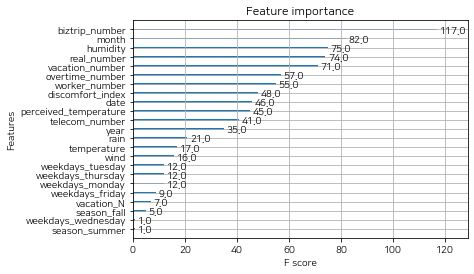

In [14]:
xgb.plot_importance(model)

In [15]:
pred = model.predict(lunch_X_test)
pred

array([ 960.8678 ,  936.72034,  798.0688 ,  662.2082 ,  959.37854,
       1040.8041 ,  699.81836,  703.4362 ,  987.6377 ,  699.1965 ,
        913.2566 , 1158.5857 , 1135.8577 ,  886.7263 ,  649.5993 ,
        946.3072 ,  815.90765, 1053.5194 ,  787.353  ,  927.09735,
        852.02246,  621.12006,  973.1312 ,  628.4922 ,  823.7763 ,
       1264.8076 , 1126.295  ,  655.5896 ,  945.98065,  861.179  ,
        892.605  ,  780.3052 , 1055.0251 , 1167.6787 ,  930.9845 ,
       1002.81836,  821.6524 , 1034.706  ,  795.40594,  653.85974,
        654.4694 ,  855.9307 , 1208.4208 ,  932.6921 ,  886.1287 ,
       1145.435  ,  785.15546, 1029.8525 ,  740.659  ,  800.23474,
        951.4834 ,  850.05786,  546.6953 ,  947.6377 ,  566.69934,
        769.6461 ,  868.81885, 1030.5999 ,  530.1046 ,  668.308  ,
       1187.7821 ,  953.80225, 1207.2384 , 1011.33826,  974.2812 ,
        820.9433 , 1041.4054 ,  729.91266,  946.549  ,  887.96796,
        982.6632 , 1198.1432 ,  851.74884,  704.30975,  924.77

In [16]:
score = model.score(lunch_X_train, lunch_y_train)
print("훈련결과 : {}".format(score))
print("점검결과 : {}".format(model.score(lunch_X_test, lunch_y_test)))

훈련결과 : 0.9056584700250347
점검결과 : 0.8284791840681989


### 저녁

In [108]:
param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
    'learning_rate':[1, 0.1, 0.01]
}
model = XGBRegressor()

gs = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=multiprocessing.cpu_count())

gs.fit(dinner_X_train, dinner_y_train)

print(gs.best_params_)
print(gs.best_score_)

{'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
-6867.528714179425


In [109]:
model = XGBRegressor(n_estimators=300, colsample_bylevel=0.7, learning_rate=0.1, colsample_bytree=0.7, max_depth=4)

model.fit(dinner_X_train, dinner_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

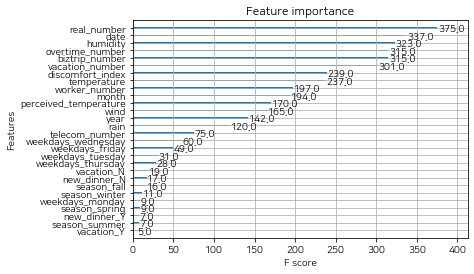

In [110]:
xgb.plot_importance(model)

In [111]:
pred = model.predict(dinner_X_test)
pred

array([506.3951  , 545.7355  , 560.67847 , 453.60538 , 477.09317 ,
       520.46027 , 569.4673  , 521.0431  , 463.9742  , 226.07358 ,
       405.50122 , 445.59686 , 512.42303 , 506.10297 , 263.00015 ,
       295.478   , 440.23413 , 583.4696  , 555.2025  , 458.98215 ,
       386.38458 , 554.3795  , 489.89307 , 416.68646 , 364.5228  ,
       644.59827 , 494.3374  , 511.23154 , 555.58234 , 546.2775  ,
        63.206936, 516.03723 , 517.7914  , 441.34512 , 439.2858  ,
       518.9681  , 480.70526 , 320.0728  , 573.04364 , 470.0521  ,
       507.63565 , 397.79785 , 502.24954 , 416.4802  , 388.6479  ,
       381.05    ,  63.109005, 263.3234  , 393.00998 , 544.729   ,
       460.9678  , 282.92484 , 382.7683  , 518.99976 , 636.182   ,
       370.8419  , 416.87195 , 526.90045 , 544.76465 , 565.84485 ,
       634.2081  , 505.45682 , 567.92236 , 278.68576 , 327.83423 ,
       541.1308  , 461.50668 , 482.97803 , 572.64154 , 604.45636 ,
       499.99078 , 502.67673 , 559.7296  , 477.62256 , 520.484

In [112]:
score = model.score(dinner_X_train, dinner_y_train)
print("훈련결과 : {}".format(score))
print("점검결과 : {}".format(model.score(dinner_X_test, dinner_y_test)))

훈련결과 : 0.975636673760262
점검결과 : 0.5702548013246657


## 릿지, 라쏘, 엘라스틱넷

### 1. 릿지 - 점심

In [15]:
param = {'alpha':[0.1, 1, 10, 100]}

model = Ridge()
gs= GridSearchCV(estimator=model, param_grid=param, scoring='neg_mean_squared_error',cv=5)

gs.fit(lunch_X_train,lunch_y_train)
print(gs.best_estimator_)

Ridge(alpha=1)


In [22]:
model = Ridge(alpha=1)

model.fit(lunch_X_train, lunch_y_train)

print("훈련 결과 : {}".format(model.score(lunch_X_train, lunch_y_train)))
print("점검 결과 : {}".format(model.score(lunch_X_test, lunch_y_test)))

훈련 결과 : 0.8042355469100188
점검 결과 : 0.7336741221016736


### 2. 릿지 - 저녁

In [23]:
param = {'alpha':[0.1, 1, 10, 100]}

model = Ridge()
gs= GridSearchCV(estimator=model, param_grid=param, scoring='neg_mean_squared_error',cv=5)

gs.fit(dinner_X_train,dinner_y_train)
print(gs.best_estimator_)

Ridge(alpha=10)


In [24]:
model = Ridge(alpha=10)

model.fit(dinner_X_train, dinner_y_train)

print("훈련 결과 : {}".format(model.score(dinner_X_train, dinner_y_train)))
print("점검 결과 : {}".format(model.score(dinner_X_test, dinner_y_test)))

훈련 결과 : 0.5300103974173856
점검 결과 : 0.5204777712713953
